# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [12]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
discharges = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df.loc[:, 'Number of Discharges'] = discharges
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

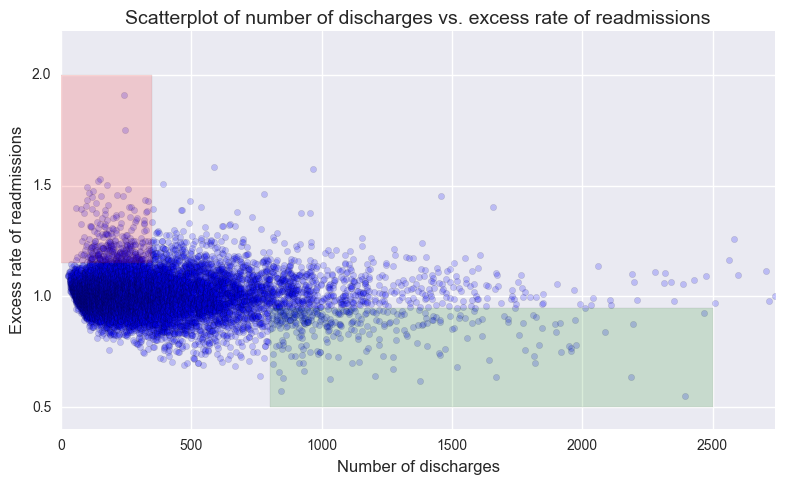

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

The conclusions are not backed by statstical tests and seem to be based only on visual observation of the plot. Only means were checked, and not the variances. Variance would  tell a larger picture.

Also there was no analysis done on the similarity of the hospital patients and their health conditions. Also, the significance was not checls, and number of hospitals in each group were not taken into account.

Let's set up the hypothesis test: 
 - H0: There is no difference between excess readmission rate in both groups.
 - HA: There is a difference.

In [5]:
print "Total records %d" %len(clean_hospital_read_df)
clean_hospital_read_df.head(2)

Total records 11578


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
#  rearrange data to have more convinient format
df = clean_hospital_read_df[["Number of Discharges", 'Number of Readmissions', 
                            'Predicted Readmission Rate','Excess Readmission Ratio']]
df.columns = ['num_discharges', 'num_readmisssiona', 'predicted_rate', 'excess_ratio']
df.head(3)

,num_discharges,num_readmisssiona,predicted_rate,excess_ratio
16857,0,NaN,NaN,NaN
14582,0,NaN,NaN,NaN
15606,0,NaN,NaN,NaN


In [7]:
# remove data with 0 discharges 
df = df[df.num_discharges > 0]
df.head()

,num_discharges,num_readmisssiona,predicted_rate,excess_ratio
1832,25,12.0,26.8,1.0914
1699,27,12.0,24.8,1.0961
1774,28,12.0,24.4,1.0934
1853,29,11.0,21.0,1.0908
1290,30,13.0,23.2,1.1123


In [8]:
# create data for small and large hospitals
df1 = df[df.num_discharges <= 100]
print '%d hospitals with num of discharges < 100'  %len(df1)
df2 = df[df.num_discharges > 1000]
print '%d hospitals with num of discharges > 1000'  %len(df2)

1223 hospitals with num of discharges < 100
463 hospitals with num of discharges > 1000


In [9]:
# check statistics
print 'Hospitals with number of discharges < 100:'
print '  mean excess ratio = %0.2f' %df1.excess_ratio.mean()
percent_hosp_1 = len(df1[df1.excess_ratio > 1]) / (1.0 * len(df1))
print '  %% hospitals with excess readmisions = %.4f' %percent_hosp_1
print 'Hospitals with number of discharges > 1000:'
print '  mean excess ratio = %0.2f' %df1.excess_ratio.mean()
percent_hosp_2 = len(df2[df2.excess_ratio > 1]) / (1.0 * len(df2))
print '  %% hospitals with excess readmisions = %.4f' %percent_hosp_2

Hospitals with number of discharges < 100:
  mean excess ratio = 1.02
  % hospitals with excess readmisions = 0.6263
Hospitals with number of discharges > 1000:
  mean excess ratio = 1.02
  % hospitals with excess readmisions = 0.4449


Statistics looks ok

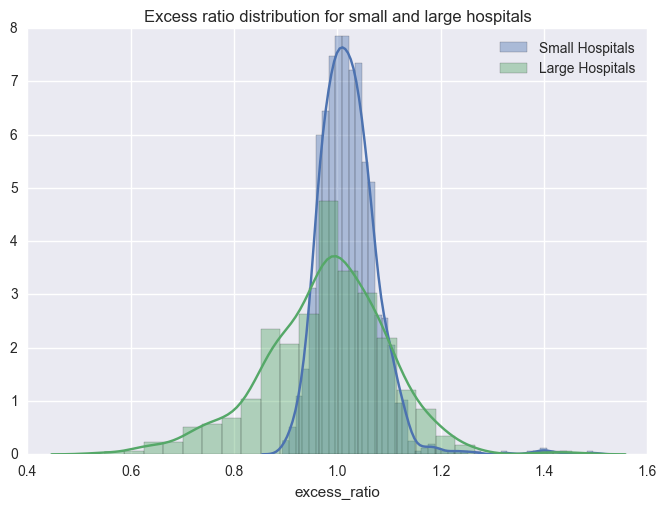

In [10]:
# plot histograms
sns.distplot(df1.excess_ratio,norm_hist=True, label = 'Small Hospitals')
sns.distplot(df2.excess_ratio,norm_hist=True, label = 'Large Hospitals')
plt.title('Excess ratio distribution for small and large hospitals')
plt.legend();

The large hopitals are actually have a larger variance and heavier tails. More large hospitals have higher excess ratios 

In [11]:
# test the ratios
from statsmodels.stats.proportion import proportions_ztest 

small_hosp = len(df1[df1.excess_ratio>1])
large_hosp = len(df2[df2.excess_ratio>1])
proportions_ztest(np.array([small_hosp,large_hosp]),np.array([len(df1),len(df2)]),value=0)

(6.7281835911048482, 1.7179408199164583e-11)

The p-value is such that we reject the null hypothesis. Thus, there seems to be a significant difference for the excess admissions rate at the 1000 discharges threshold.